**SHARKNADO 2: AHORA ES PERSONAL**

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\Álvaro\\Desktop\\ironhack\\Data-Cleaning-Poject\\proyecto\\attacks.csv', encoding = 'latin-1')

In [4]:
df.shape

(25723, 24)

In [5]:
df.isna().sum()   # Comprobamos los nulos

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
df = df.dropna(how='all') # Quitamos las columnas cuyos valores sean todos nulos

In [7]:
columnas = ['Case Number','original order']  # Otra limpieza de nulos, esta vez que todas las columnas lo sean a excepción de esas dos
df = df.dropna(subset=df.columns.difference(columnas), how='all')

**SEXO**

In [8]:
# Para la columna del sexo de la víctima: primero vemos qué valores únicos existen.

df['Sex '].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [9]:
# Sustituimos y/o corregimos lo valores

df['Sex '] = df['Sex '].fillna('Unknown')
df['Sex '] = df['Sex '].replace ("M ", "M")
df['Sex '] = df['Sex '].replace (".", "Unknown")

**FATALIDAD**

In [10]:
# Para la columna de fatalidad, primero sustiuimos los valores nulos

df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('UNKNOWN')

In [11]:
#Checkeamos los valores únicos y unificamos/corregimos

df['Fatal (Y/N)'].unique()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace (" N", "N")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace ("N ", "N")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace ("y", "Y")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace ("M", "N")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace ("2017", "N")

In [12]:
df['Fatal (Y/N)'].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

**TIPO DE ATAQUE**

In [13]:
# Comprobamos valores únicos y unificamos y corregimos

df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [14]:
df['Type'] = df['Type'].fillna('Unknown')
df['Type'] = df['Type'].replace ("Boat", "Boating")
df['Type'] = df['Type'].replace ("Boatomg", "Boating")
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Unknown'], dtype=object)

**PAÍS**

In [15]:
# Comprobamos los valores de los países. Obeservamos que algunos no son países (ciudad,regiones...).
# Procedemos a poner los valores correctos utilizando un diccionario con key/values para corregir estos elementos manualmente.
# En este caso lo haremos a través de una función que se aplicará a todo el eje.

df['Country'] = df['Country'].str.upper()
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB E

In [16]:
def reemplazar_ciudades_por_paises(texto):
    original_lista = ['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA', 'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'ECUADOR', 'MALAYSIA', 'LIBYA', np.nan, 'CUBA', 'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)', 'AZORES', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOMALIA', 'NEVIS', 'BRITISH VIRGIN ISLANDS', 'NORWAY', 'SENEGAL', 'YEMEN', 'GULF OF ADEN', 'SIERRA LEONE', 'ST. MAARTIN', 'GRAND CAYMAN', 'LIBERIA', 'VANUATU', 'MEXICO ', 'HONDURAS', 'VENEZUELA', 'SRI LANKA', ' TONGA', 'URUGUAY', 'INDIA', 'MICRONESIA', 'CARIBBEAN SEA', 'OKINAWA', 'TANZANIA', 'MARSHALL ISLANDS', 'EGYPT / ISRAEL', 'NORTHERN ARABIAN SEA', 'HONG KONG', 'EL SALVADOR', 'ANGOLA', 'BERMUDA', 'MONTENEGRO', 'IRAN', 'TUNISIA', 'NAMIBIA', 'NORTH ATLANTIC OCEAN', 'PORTUGAL', 'SOUTH CHINA SEA', 'BANGLADESH', 'PALAU', 'WESTERN SAMOA', 'PACIFIC OCEAN ', 'BRITISH ISLES', 'GRENADA', 'IRAQ', 'TURKEY', 'SINGAPORE', 'NEW BRITAIN', 'SUDAN', 'JOHNSTON ISLAND', 'SOUTH PACIFIC OCEAN', 'NEW GUINEA', 'RED SEA', 'NORTH PACIFIC OCEAN', 'FEDERATED STATES OF MICRONESIA', 'MID ATLANTIC OCEAN', 'ADMIRALTY ISLANDS', 'BRITISH WEST INDIES', 'SOUTH ATLANTIC OCEAN', 'PERSIAN GULF', 'RED SEA / INDIAN OCEAN', 'PACIFIC OCEAN', 'NORTH SEA', 'NICARAGUA ', 'MALDIVE ISLANDS', 'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'GABON', 'MAYOTTE', 'NORTH ATLANTIC OCEAN ', 'THE BALKANS', 'SUDAN?', 'ARGENTINA', 'MARTINIQUE', 'INDIAN OCEAN', 'GUATEMALA', 'NETHERLANDS ANTILLES', 'NORTHERN MARIANA ISLANDS', 'IRAN / IRAQ', 'JAVA', ' PHILIPPINES', 'NICARAGUA', 'CENTRAL PACIFIC', 'SOLOMON ISLANDS / VANUATU', 'SOUTHWEST PACIFIC OCEAN', 'BAY OF BENGAL', 'MID-PACIFC OCEAN', 'SLOVENIA', 'CURACAO', 'ICELAND', 'ITALY / CROATIA', 'BARBADOS', 'MONACO', 'GUYANA', 'HAITI', 'SAN DOMINGO', 'IRELAND', 'KUWAIT', 'YEMEN ', 'REUNION ISLAND', 'FALKLAND ISLANDS', 'CRETE', 'CYPRUS', 'EGYPT ', 'WEST INDIES', 'BURMA', 'LEBANON', 'PARAGUAY', 'BRITISH NEW GUINEA', 'CEYLON', 'OCEAN', 'GEORGIA', 'SYRIA', 'TUVALU', 'INDIAN OCEAN?', 'GUINEA', 'ANDAMAN ISLANDS', 'EQUATORIAL GUINEA / CAMEROON', 'COOK ISLANDS', 'TOBAGO', 'PERU', 'AFRICA', 'ALGERIA', 'COAST OF AFRICA', 'TASMAN SEA', 'GHANA', 'GREENLAND', 'MEDITERRANEAN SEA', 'SWEDEN', 'ROATAN', 'BETWEEN PORTUGAL & INDIA', 'DJIBOUTI', 'BAHREIN', 'KOREA', 'RED SEA?', 'ASIA?', 'CEYLON (SRI LANKA)']

    reemplazos = {'USA': 'USA',
    'AUSTRALIA': 'AUSTRALIA',
    'MEXICO': 'MEXICO',
    'BRAZIL': 'BRAZIL',
    'ENGLAND': 'UNITED KINGDOM',
    'SOUTH AFRICA': 'SOUTH AFRICA',
    'THAILAND': 'THAILAND',
    'COSTA RICA': 'COSTA RICA',
    'MALDIVES': 'MALDIVES',
    'BAHAMAS': 'BAHAMAS',
    'NEW CALEDONIA': 'NEW CALEDONIA',
    'ECUADOR': 'ECUADOR',
    'MALAYSIA': 'MALAYSIA',
    'LIBYA': 'LIBYA',
    'CUBA': 'CUBA',
    'MAURITIUS': 'MAURITIUS',
    'NEW ZEALAND': 'NEW ZEALAND',
    'SPAIN': 'SPAIN',
    'SAMOA': 'SAMOA',
    'SOLOMON ISLANDS': 'SOLOMON ISLANDS',
    'JAPAN': 'JAPAN',
    'EGYPT': 'EGYPT',
    'ST HELENA, BRITISH OVERSEAS TERRITORY': 'ST HELENA',
    'COMOROS': 'COMOROS',
    'REUNION': 'REUNION',
    'FRENCH POLYNESIA': 'FRENCH POLYNESIA',
    'UNITED KINGDOM': 'UNITED KINGDOM',
    'UNITED ARAB EMIRATES': 'UNITED ARAB EMIRATES',
    'PHILIPPINES': 'PHILIPPINES',
    'INDONESIA': 'INDONESIA',
    'CHINA': 'CHINA',
    'COLOMBIA': 'COLOMBIA',
    'CAPE VERDE': 'CAPE VERDE',
    'FIJI': 'FIJI',
    'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC',
    'CAYMAN ISLANDS': 'CAYMAN ISLANDS',
    'ARUBA': 'ARUBA',
    'MOZAMBIQUE': 'MOZAMBIQUE',
    'PUERTO RICO': 'PUERTO RICO',
    'ITALY': 'ITALY',
    'ATLANTIC OCEAN': 'ATLANTIC OCEAN',
    'GREECE': 'GREECE',
    'ST. MARTIN': 'ST. MARTIN',
    'FRANCE': 'FRANCE',
    'PAPUA NEW GUINEA': 'PAPUA NEW GUINEA',
    'TRINIDAD & TOBAGO': 'TRINIDAD & TOBAGO',
    'KIRIBATI': 'KIRIBATI',
    'ISRAEL': 'ISRAEL',
    'DIEGO GARCIA': 'DIEGO GARCIA',
    'TAIWAN': 'TAIWAN',
    'JAMAICA': 'JAMAICA',
    'PALESTINIAN TERRITORIES': 'PALESTINIAN TERRITORIES',
    'GUAM': 'GUAM',
    'SEYCHELLES': 'SEYCHELLES',
    'BELIZE': 'BELIZE',
    'NIGERIA': 'NIGERIA',
    'TONGA': 'TONGA',
    'SCOTLAND': 'SCOTLAND',
    'CANADA': 'CANADA',
    'CROATIA': 'CROATIA',
    'SAUDI ARABIA': 'SAUDI ARABIA',
    'CHILE': 'CHILE',
    'ANTIGUA': 'ANTIGUA',
    'KENYA': 'KENYA',
    'RUSSIA': 'RUSSIA',
    'TURKS & CAICOS': 'TURKS & CAICOS',
    'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES',
    'AZORES': 'AZORES',
    'SOUTH KOREA': 'SOUTH KOREA',
    'MALTA': 'MALTA',
    'VIETNAM': 'VIETNAM',
    'MADAGASCAR': 'MADAGASCAR',
    'PANAMA': 'PANAMA',
    'SOMALIA': 'SOMALIA',
    'NEVIS': 'NEVIS',
    'BRITISH VIRGIN ISLANDS': 'BRITISH VIRGIN ISLANDS',
    'NORWAY': 'NORWAY',
    'SENEGAL': 'SENEGAL',
    'YEMEN': 'YEMEN',
    'GULF OF ADEN': 'GULF OF ADEN',
    'SIERRA LEONE': 'SIERRA LEONE',
    'ST. MAARTIN': 'ST. MAARTIN',
    'GRAND CAYMAN': 'GRAND CAYMAN',
    'LIBERIA': 'LIBERIA',
    'VANUATU': 'VANUATU',
    'MEXICO ': 'MEXICO',
    'HONDURAS': 'HONDURAS',
    'VENEZUELA': 'VENEZUELA',
    'SRI LANKA': 'SRI LANKA',
    ' TONGA': 'TONGA',
    'URUGUAY': 'URUGUAY',
    'INDIA': 'INDIA',
    'MICRONESIA': 'MICRONESIA',
    'CARIBBEAN SEA': 'CARIBBEAN SEA',
    'OKINAWA': 'OKINAWA',
    'TANZANIA': 'TANZANIA',
    'MARSHALL ISLANDS': 'MARSHALL ISLANDS',
    'EGYPT / ISRAEL': 'EGYPT / ISRAEL',
    'NORTHERN ARABIAN SEA': 'NORTHERN ARABIAN SEA',
    'HONG KONG': 'HONG KONG',
    'EL SALVADOR': 'EL SALVADOR',
    'ANGOLA': 'ANGOLA',
    'BERMUDA': 'BERMUDA',
    'MONTENEGRO': 'MONTENEGRO',
    'IRAN': 'IRAN',
    'TUNISIA': 'TUNISIA',
    'NAMIBIA': 'NAMIBIA',
    'NORTH ATLANTIC OCEAN': 'ATLANTIC OCEAN',
    'PORTUGAL': 'PORTUGAL',
    'SOUTH CHINA SEA': 'SOUTH CHINA SEA',
    'BANGLADESH': 'BANGLADESH',
    'PALAU': 'PALAU',
    'WESTERN SAMOA': 'WESTERN SAMOA',
    'PACIFIC OCEAN ': 'PACIFIC OCEAN',
    'BRITISH ISLES': 'UNITED KINGDOM',
    'GRENADA': 'GRENADA',
    'IRAQ': 'IRAQ',
    'TURKEY': 'TURKEY',
    'SINGAPORE': 'SINGAPORE',
    'NEW BRITAIN': 'PAPUA NEW GUINEA',
    'SUDAN': 'SUDAN',
    'JOHNSTON ISLAND': 'JOHNSTON ISLAND',
    'SOUTH PACIFIC OCEAN': 'SOUTH PACIFIC OCEAN',
    'NEW GUINEA': 'PAPUA NEW GUINEA',
    'RED SEA': 'RED SEA',
    'NORTH PACIFIC OCEAN': 'PACIFIC OCEAN',
    'FEDERATED STATES OF MICRONESIA': 'MICRONESIA',
    'MID ATLANTIC OCEAN': 'ATLANTIC OCEAN',
    'ADMIRALTY ISLANDS': 'PAPUA NEW GUINEA',
    'BRITISH WEST INDIES': 'UNITED KINGDOM',
    'SOUTH ATLANTIC OCEAN': 'SOUTH ATLANTIC OCEAN',
    'PERSIAN GULF': 'PERSIAN GULF',
    'RED SEA / INDIAN OCEAN': 'RED SEA / INDIAN OCEAN',
    'PACIFIC OCEAN': 'PACIFIC OCEAN',
    'NORTH SEA': 'NORTH SEA',
    'NICARAGUA ': 'NICARAGUA',
    'MALDIVE ISLANDS': 'MALDIVES',
    'AMERICAN SAMOA': 'AMERICAN SAMOA',
    'ANDAMAN / NICOBAR ISLANDS': 'INDIA',
    'GABON': 'GABON',
    'MAYOTTE': 'MAYOTTE',
    'NORTH ATLANTIC OCEAN ': 'ATLANTIC OCEAN',
    'THE BALKANS': 'VARIOUS',
    'SUDAN?': 'SUDAN',
    'ARGENTINA': 'ARGENTINA',
    'MARTINIQUE': 'MARTINIQUE',
    'INDIAN OCEAN': 'INDIAN OCEAN',
    'GUATEMALA': 'GUATEMALA',
    'NETHERLANDS ANTILLES': 'NETHERLANDS ANTILLES',
    'NORTHERN MARIANA ISLANDS': 'NORTHERN MARIANA ISLANDS',
    'IRAN / IRAQ': 'IRAN / IRAQ',
    'JAVA': 'INDONESIA',
    ' PHILIPPINES': 'PHILIPPINES',
    'NICARAGUA': 'NICARAGUA',
    'CENTRAL PACIFIC': 'VARIOUS',
    'SOLOMON ISLANDS / VANUATU': 'SOLOMON ISLANDS / VANUATU',
    'SOUTHWEST PACIFIC OCEAN': 'VARIOUS',
    'BAY OF BENGAL': 'BAY OF BENGAL',
    'MID-PACIFIC OCEAN': 'VARIOUS',
    'SLOVENIA': 'SLOVENIA',
    'CURACAO': 'CURACAO',
    'ICELAND': 'ICELAND',
    'ITALY / CROATIA': 'ITALY / CROATIA',
    'BARBADOS': 'BARBADOS',
    'MONACO': 'MONACO',
    'GUYANA': 'GUYANA',
    'HAITI': 'HAITI',
    'SAN DOMINGO': 'DOMINICAN REPUBLIC',
    'IRELAND': 'IRELAND',
    'KUWAIT': 'KUWAIT',
    'YEMEN ': 'YEMEN',
    'REUNION ISLAND': 'REUNION',
    'FALKLAND ISLANDS': 'FALKLAND ISLANDS',
    'CRETE': 'GREECE',
    'CYPRUS': 'CYPRUS',
    'EGYPT ': 'EGYPT',
    'WEST INDIES': 'VARIOUS',
    'BURMA': 'MYANMAR',
    'LEBANON': 'LEBANON',
    'PARAGUAY': 'PARAGUAY',
    'BRITISH NEW GUINEA': 'PAPUA NEW GUINEA',
    'CEYLON': 'SRI LANKA',
    'OCEAN': 'VARIOUS',
    'GEORGIA': 'GEORGIA',
    'SYRIA': 'SYRIA',
    'TUVALU': 'TUVALU',
    'INDIAN OCEAN?': 'INDIAN OCEAN',
    'GUINEA': 'GUINEA',
    'ANDAMAN ISLANDS': 'INDIA',
    'EQUATORIAL GUINEA / CAMEROON': 'EQUATORIAL GUINEA / CAMEROON',
    'COOK ISLANDS': 'COOK ISLANDS',
    'TOBAGO': 'TRINIDAD & TOBAGO',
    'PERU': 'PERU',
    'AFRICA': 'VARIOUS',
    'ALGERIA': 'ALGERIA',
    'COAST OF AFRICA': 'VARIOUS',
    'TASMAN SEA': 'TASMAN SEA',
    'GHANA': 'GHANA',
    'GREENLAND': 'GREENLAND',
    'MEDITERRANEAN SEA': 'MEDITERRANEAN SEA',
    'SWEDEN': 'SWEDEN',
    'ROATAN': 'HONDURAS',
    'BETWEEN PORTUGAL & INDIA': 'VARIOUS',
    'DJIBOUTI': 'DJIBOUTI',
    'BAHRAIN': 'BAHRAIN',
    'KOREA': 'SOUTH KOREA',
    'RED SEA': 'RED SEA',
    'ASIA': 'VARIOUS',
    'CEYLON (SRI LANKA)': 'SRI LANKA'
}
       
    
    if texto in reemplazos:
        return reemplazos[texto]
    else:
        return texto
    
df['Country'] = df['Country'].apply(reemplazar_ciudades_por_paises)
df['Country'] = df['Country'].fillna('Unknown')

**ÁREA Y UBICACIÓN**

In [17]:
# Simplemente rellenamos los valores nulos con 'Unknown'

df['Location'] = df['Location'].fillna('Unknown')
df['Area'] = df['Area'].fillna('Unknown')

**ESPECIES**

In [18]:
# Para la columna Species, rellenamos los nulos y ponemos todo en minúscula para posterioremente usar la función de str.replace
# para aquellas string que tienen las principales especies de tiburón. Para las descripciones que son ambiguas respecto de la 
# especie, simplemente lo denominamos como "Shark" a secas.

df['Species '] = df['Species '].fillna('Unknown')
df['Species '] = df['Species '].str.lower()

In [19]:
df['Species '] = df['Species '].str.replace('.*white.*', 'White Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*tiger.*', 'Tiger Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*lemon.*', 'Lemon Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*bull.*', 'Bull Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*nurse.*', 'Nurse Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*blacktip.*', 'Blacktip Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*wobbegong.*', 'Wobbegong Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*cookiecutter.*', 'Cookiecutter Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*reef.*', 'Reef Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*blue.*', 'Blue Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*spinner.*', 'Spinner Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*galapagos.*', 'Galapagos Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*whitetip.*', 'Whitetip Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*hammerhead.*', 'Hammerhead Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*silky.*', 'Silky Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*mako.*', 'Mako Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*bronze.*', 'Bronze Shark', case=False, regex=True)
df['Species '] = df['Species '].str.replace('.*shark.*', 'Shark', regex=True)
df = df[df['Species '].str.contains(r'shark|Shark', case=False, na=False)]  #Filtramos para que solo nos queden las filas 
# en las que aparezcan las palabras S/shark, ya que en muchas filas no se especifica si es seguro que sea un ataque de tiburón

In [20]:
df['Species '].unique()

array(['White Shark', 'Shark', 'Tiger Shark', 'Lemon Shark', 'Bull Shark',
       'Reef Shark', 'Nurse Shark', 'Wobbegong Shark', 'Blacktip Shark',
       'Galapagos Shark', 'Blue Shark', 'Cookiecutter Shark',
       'Spinner Shark', 'Mako Shark', 'Bronze Shark', 'Silky Shark',
       'Hammerhead Shark'], dtype=object)

**EDAD**

In [21]:
# Para la columna edad, filtramos el dataframe y unificamos todos los valores únicos para que puedan convertirse a enteros.
# Como en la columna de países, lo haremos mediante un diccionario, esta vez con .replace

df['Age'] = df['Age'].replace({
    '18 months': 1,
    'teen': 15, 
    'mid-20s': 25, 
    'Ca. 33': 33,
    '>50': 50, 
    'adult': None,  
    '9 & 12': None,  
    '? & 19': None, 
    '9 months': 1,  
    '25 to 35': None,  
    '23 & 26': None,  
    '33 & 37': None,  
    '37, 67, 35, 27,  ? & 27': None,  
    '30 & 32': None, 
    '50 & 30': None, 
    '17 & 35': None,
    '13 or 18': None, 
    '34 & 19': None, 
    '2 to 3 months': 0,  
    'MAKE LINE GREEN': None,
    ' 43': 43, 
    '"young"': 15,  
    '7 or 8': 7, 
    '17 & 16': None, 
    'Both 11': 11,  
    '9 or 10': 9, 
    '13 or 14': 13,
    '60s': 65,
    '40s': 45,
    'Teen': 15,
    '20s': 25,
    '30s': 35,
    '28 & 26': 27,
    '18 or 20': 19,
    '46 & 34': 46,
    '36 & 26': 30,
    '8 or 10': 9,
    '\xa0 ': None,
    ' ': None,
    '30 or 36': 33,
    '6½': 6,
    '21 & ?': 21,
    '23 & 20': 21,
    ' 30': 30,
    ' 28': 28,
    '20?': 20,
    "60's": 65,
    '32 & 30': 31,
    '16 to 18': 17,
    
})

df['Age'] = df['Age'].apply(lambda x: np.nan if x == "Unknown" else x)

**HORA**

In [22]:
# Para la columna en la que se reflejan los elementos para el momento en que se produjo el ataque, aplicaremos un diccionario
# a través de un mapeo tras sacar los valores únicos y sustituirlos por "Morning", "Afternoon" y "Night" dependiendo de la hora
# en la que se produjera.

time_mapping = {
    '18h00': 'Afternoon',
    'nan': 'Unknown',
    'Late afternoon': 'Afternoon',
    '17h00': 'Afternoon',
    'Morning': 'Morning',
    '10h30': 'Morning',
    '10h40': 'Morning',
    '09h30': 'Morning',
    'Afternoon': 'Afternoon',
    '21h50': 'Night',
    '09h40': 'Morning',
    '15h00': 'Afternoon',
    '17h35': 'Afternoon',
    '15h30': 'Afternoon',
    '07h30': 'Morning',
    '19h00, Dusk': 'Night',
    '16h00': 'Afternoon',
    '08h00': 'Morning',
    '15h01': 'Afternoon',
    '13h45': 'Afternoon',
    '23h30': 'Morning',
    '09h00': 'Morning',
    '14h30': 'Afternoon',
    '18h30': 'Afternoon',
    '12h30': 'Morning',
    '14h00': 'Afternoon',
    '18h45': 'Afternoon',
    '06h00': 'Morning',
    'Midday': 'Afternoon',
    '10h00': 'Morning',
    '13h30': 'Afternoon',
    '10h45': 'Morning',
    '11h20': 'Morning',
    '07h45': 'Morning',
    '11h00': 'Morning',
    '19h30': 'Afternoon',
    '08h30': 'Morning',
    '15h45': 'Afternoon',
    'Shortly before 12h00': 'Afternoon',
    '08h50': 'Morning',
    '12h00': 'Afternoon',
    '07h00': 'Morning',
    '02h00': 'Night',
    '9h00': 'Morning',
    '15h15': 'Afternoon',
    '16h30': 'Afternoon',
    '11h30': 'Morning',
    'After noon': 'Afternoon',
    '22h00': 'Morning',
    '16h20': 'Afternoon',
    '15h25': 'Afternoon',
    '17h30': 'Afternoon',
    'Morning ': 'Morning',
    '13h20': 'Afternoon',
    'Midnight': 'Night',
    '09h30 / 10h00': 'Morning',
    '10h15': 'Morning',
    '18h15': 'Afternoon',
    '13h50': 'Afternoon',
    '19h20': 'Afternoon',
    '10h25': 'Morning',
    '10h45-11h15': 'Morning',
    '16h45': 'Afternoon',
    '15h52': 'Unknown',
    '06h15': 'Morning',
    '14h40': 'Afternoon',
    '19h45': 'Afternoon',
    '19h00': 'Afternoon',
    '10h10': 'Morning',
    '08h45': 'Morning',
    '12h10': 'Afternoon',
    '18h05': 'Afternoon',
    '12h25': 'Afternoon',
    '17h51': 'Afternoon',
    '16h12': 'Afternoon',
    '12h45': 'Afternoon',
    '10h50': 'Morning',
    '14h15': 'Afternoon',
    '13h00': 'Afternoon',
    '09h45': 'Morning',
    '11h45': 'Morning',
    '06h45': 'Morning',
    '05h00': 'Morning',
    '03h30': 'Morning',
    'Night': 'Night',
    '11h15': 'Morning',
    '06h30': 'Morning',
    '20h00': 'Night',
    '16h40': 'Afternoon',
    '16h18': 'Afternoon',
    '11h10': 'Morning',
    '17h50': 'Afternoon',
    '18h15-18h30': 'Afternoon',
    '08h20': 'Morning',
    '20h30': 'Night',
    '15h19': 'Afternoon',
    '10h55': 'Morning',
    '15h55': 'Afternoon',
    '23h00': 'Night',
    '12h40': 'Afternoon',
    '16h05': 'Afternoon',
    '14h10': 'Afternoon',
    '12h50': 'Afternoon',
    '13h40': 'Afternoon',
    '13h24': 'Afternoon',
    '09h00 - 09h30': 'Morning',
    '0830': 'Morning',
    '14h50': 'Afternoon',
    '11h40': 'Morning',
    '08h10': 'Morning',
    '15h56': 'Afternoon',
    '1600': 'Afternoon',
    '17h17': 'Afternoon',
    '09h05': 'Morning',
    '07h15': 'Morning',
    '14h20': 'Afternoon',
    '07h20': 'Morning',
    '19h28': 'Afternoon',
    '12h38': 'Afternoon',
    '05h50': 'Morning',
    '15h50': 'Afternoon',
    '11h05': 'Morning',
    '15h40': 'Afternoon',
    'Early morning': 'Morning',
    '05h45': 'Morning',
    '13h25': 'Afternoon',
    '09h50': 'Morning',
    '13h26': 'Afternoon',
    '09h11': 'Morning',
    'Evening': 'Night',
    '13h15': 'Afternoon',
    '17h45': 'Afternoon',
    'Early afternoon': 'Afternoon',
    '18h20': 'Afternoon',
    '15h35': 'Afternoon',
    '14h55': 'Afternoon',
    '08h05': 'Morning',
    '19h15': 'Afternoon',
    '10h35': 'Morning',
    '14h45': 'Afternoon',
    '21h00': 'Night',
    'Lunchtime': 'Afternoon',
    '15j45': 'Afternoon',
    '09h35': 'Morning',
    '10h27': 'Morning',
    '10h16': 'Morning',
    'Before 07h00': 'Morning',
    '09h20': 'Morning',
    '17h20': 'Afternoon',
    'Dusk': 'Night',
    '13h55': 'Afternoon',
    '18h50': 'Afternoon',
    '"Just before 11h00"': 'Morning',
    '11h115': 'Morning',
    '08h15': 'Morning',
    '12h39': 'Afternoon',
    '07h05': 'Morning',
    '12h15': 'Afternoon',
    '11h50': 'Morning',
    '"Evening"': 'Night',
    'Just before sundown': 'Afternoon',
    '17h15': 'Afternoon',
    '12h05': 'Afternoon',
    '15h20': 'Afternoon',
    '16h10': 'Afternoon',
    '06h10': 'Morning',
    '16h15': 'Afternoon',
    'Between 05h00 and 08h00': 'Morning',
    '07h08': 'Morning',
    '17h00 or 17h40': 'Afternoon',
    '>08h00': 'Morning',
    '12h20': 'Afternoon',
    '--': 'Unknown',
    '12h55': 'Afternoon',
    '16h14': 'Afternoon',
    '17h11': 'Afternoon',
    '00h30': 'Night',
    '10h07': 'Morning',
    '13h23': 'Afternoon',
    'Just after 12h00': 'Afternoon',
    '02h30': 'Night',
    '08h40': 'Morning',
    '11h56': 'Morning',
    '14h35': 'Afternoon',
    ' ': 'Unknown',
    'Early Morning': 'Morning',
    'Shortly after midnight': 'Night',
    '13h345': 'Afternoon',
    '\xa0 ': 'Unknown',
    '09h00 -10h00': 'Morning',
    '20h45 (Sunset)': 'Afternoon',
    'Late morning': 'Morning',
    'P.M.': 'Afternoon',
    'Shortly before 13h00': 'Afternoon',
    '12h34': 'Afternoon',
    '11h53': 'Morning',
    '8:04 pm': 'Night',
    '12h35': 'Afternoon',
    'Possibly same incident as 2000.08.21': 'Afternoon',
    'Noon': 'Afternoon',
    '17h40': 'Afternoon',
    '11h25': 'Morning',
    '18h25': 'Afternoon',
    '10h28': 'Morning',
    '09h15': 'Morning',
    '20h15': 'Night',
    '14h16': 'Afternoon',
    '09h55': 'Morning',
    '2 hours after Opperman': 'Morning',
    '15h05': 'Afternoon',
    '09h30 ': 'Morning',
    '11h00 / 11h30': 'Morning',
    '07h19': 'Morning',
    '11h06': 'Morning',
    '"Night"': 'Night',
    '18h30?': 'Afternoon',
    '11h58': 'Morning',
    '11h51': 'Morning',
    '18h12': 'Afternoon',
    '07h10': 'Morning',
    'A.M.': 'Morning',
    '07h40': 'Morning',
    '12h33': 'Afternoon',
    '>06h45': 'Morning',
    '15h06': 'Afternoon',
    '12h54': 'Afternoon',
    '16h35': 'Afternoon',
    'Between 06h00 & 07h20': 'Morning',
    '16h55': 'Afternoon',
    '16h50': 'Afternoon',
    '05h40': 'Morning',
    '21h30': 'Night',
    'X': 'Unknown',
    '08h57': 'Morning',
    '06j00': 'Morning',
    '08h35': 'Morning',
    '04h00': 'Night',
    '10h20': 'Morning',
    '18h10': 'Afternoon',
    '03h00': 'Night',
    'Mid-morning': 'Morning',
    '16h30 or 18h00': 'Afternoon',
    '14h00': 'Afternoon',
    'Daytime': 'Afternoon',
    '12h48': 'Afternoon',
    '06h50': 'Morning',
    '18h40': 'Afternoon',
    '01h00': 'Night',
    'Dark': 'Night',
    '10h00 / 11h00': 'Morning',
    '"After lunch"': 'Afternoon',
    '07h32': 'Morning',
    '15h00 or 15h45': 'Afternoon',
    '>17h00': 'Afternoon',
    '19h00 / 20h00': 'Afternoon',
    'Dawn': 'Morning',
    '12h45 / 13h45': 'Afternoon',
    '14h00 - 15h00': 'Afternoon',
    '13h10': 'Afternoon',
    '09h30 / 15h30': 'Morning',
    '08h00 / 09h30': 'Morning',
    '19h35': 'Afternoon',
    'Late night': 'Night',
    '10h30 or 13h30': 'Morning',
    '17h10': 'Afternoon',
    '16h23': 'Afternoon',
    '13h05': 'Afternoon',
    '"After dark"': 'Night',
    '10h00 or 14h00': 'Morning',
    '1500': 'Afternoon',
    '>14h30': 'Afternoon',
    'After dusk': 'Night',
    'Late afternon': 'Afternoon',
    'Late Afternoon': 'Afternoon',
    '   ': 'Unknown',
    'dusk': 'Night',
    '01h50': 'Night'
}

df['Time'] = df['Time'].map(time_mapping)
df['Time'] = df['Time'].fillna("Unknown")

In [23]:
df['Time'].unique()

array(['Afternoon', 'Unknown', 'Morning', 'Night'], dtype=object)

In [24]:
df['Case Number'].astype(str)

0         2018.06.25
3         2018.06.08
4         2018.06.04
6       2018.06.03.a
7         2018.05.27
            ...     
6276         ND.0026
6293         ND.0009
6294         ND.0008
6295         ND.0007
6296         ND.0006
Name: Case Number, Length: 3242, dtype: object

**NÚMERO DE CASO**

In [36]:
# Indexamos la columna para sus valores únicos. En este caso se podría prescendir de las otras dos columnas con el mismo nombre
# ya que son prácticamente idénticas. No lo haremos.

df['Case Number'] = [int(e) for e in range(1, len(df)+1)]



**FECHA**

In [37]:
# Corregimos los caracteres especiales

df['Date'] = df['Date'].str.extract('^(\d{4}\.\d{2}\.\d{2})', expand=False)

df['Date'].update(pd.Series(nuevos_valores))


NameError: name 'nuevos_valores' is not defined

In [38]:
df['Year'] = df['Year'].replace(0, np.nan)

**OTRAS COLUMNAS**

In [28]:
df.loc[:,"Unnamed: 22"] = "Unknown"

df.loc[:,"Unnamed: 23"] = "Unknown"

# ANÁLISIS DE ATAQUES DE TIBURONES

**TOP 3 PAÍSES** DONDE SE PRODUCEN MÁS **ATAQUES DE TIBURONES**

In [29]:
attack_counts = df['Country'].value_counts()
attack_counts.head()

Country
USA             1248
AUSTRALIA        758
SOUTH AFRICA     392
BAHAMAS           74
NEW ZEALAND       72
Name: count, dtype: int64

¿QUÉ **SEXO** SUFRE MÁS **ATAQUES**?

In [30]:
filtered_df = df[(df['Fatal (Y/N)'].isin(['Y', 'N'])) & (df['Sex '].isin(['M', 'F']))]
contingency_table = pd.crosstab(filtered_df['Fatal (Y/N)'], filtered_df['Sex '])
contingency_table.T

Fatal (Y/N),N,Y
Sex,,
F,257,53
M,1993,342


¿QUÉ **SEXO** TIENE MAYOR **PORCENTAJE DE MORTALIDAD**?

In [31]:
filtered_df = df[(df['Sex '].isin(['M', 'F'])) & (df['Fatal (Y/N)'] != 'Unknown')]

grouped = filtered_df.groupby('Sex ')

indices_sexo = (grouped['Fatal (Y/N)'].value_counts(normalize=True) * 100).unstack()

indices_sexo.T

Sex,F,M
Fatal (Y/N),,
N,72.598870,76.831149
UNKNOWN,12.429379,9.984580
Y,14.971751,13.184271


¿CUÁL ES EL **INDICE DE FATALIDAD**?

In [32]:
incidentes_fatales = df['Fatal (Y/N)'].value_counts().get('Y', 0)

incidentes_totales = df['Fatal (Y/N)'].count()

indice_fatalidad = (incidentes_fatales / incidentes_totales) * 100

indice_fatalidad


12.924120913016656

¿EN QUÉ **MOMENTO DEL DÍA** SE PRODUCEN MÁS ATAQUES?

In [33]:
df['Time'].value_counts()

Time
Unknown      1414
Afternoon    1062
Morning       664
Night         102
Name: count, dtype: int64

¿QUÉ ESPECIA ES MÁS **AGRESIVA**?

In [34]:
df['Species '].value_counts()

Species 
Shark                 1526
White Shark            667
Tiger Shark            283
Bull Shark             175
Blacktip Shark         101
Nurse Shark             97
Bronze Shark            64
Blue Shark              56
Mako Shark              54
Reef Shark              51
Wobbegong Shark         50
Hammerhead Shark        48
Lemon Shark             37
Spinner Shark           21
Galapagos Shark          7
Silky Shark              4
Cookiecutter Shark       1
Name: count, dtype: int64

¿QUÉ ESPECIE TIENE EL MAYOR PORCENTAJE DE **LETALIDAD**?

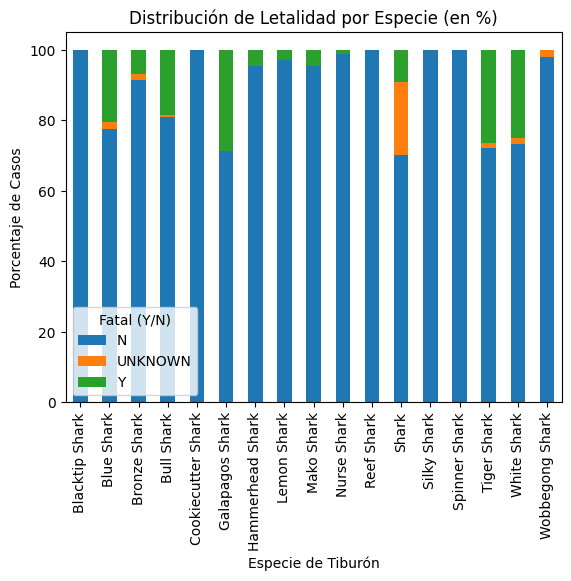

In [35]:
import matplotlib.pyplot as plt
contingency_table = pd.crosstab(filtered_df['Species '], filtered_df['Fatal (Y/N)'])
contingency_table_percentage = contingency_table.div(contingency_table.sum(1), axis=0) * 100
contingency_table_percentage.plot(kind='bar', stacked=True, title='Distribución de Letalidad por Especie (en %)')
plt.xlabel('Especie de Tiburón')
plt.ylabel('Porcentaje de Casos')
plt.show()

![Tiburon de las Galápagos](https://upload.wikimedia.org/wikipedia/commons/5/53/Carcharinus_galapagensis_1.jpg)

In [39]:
df.memory_usage(deep = True, index = False)  #Intento de optimización ("sale regular")

Case Number                25936
Date                      103814
Year                       25936
Type                      214685
Country                   207241
Area                      223719
Location                  260667
Activity                  226024
Name                      232945
Sex                       189784
Age                       158514
Injury                    299470
Fatal (Y/N)               190178
Time                      209408
Species                   211848
Investigator or Source    293606
pdf                       260787
href formula              435750
href                      436406
Case Number.1             219124
Case Number.2             219124
original order             25936
Unnamed: 22               207488
Unnamed: 23               207488
dtype: int64

In [40]:
df.dtypes

Case Number                 int64
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [42]:
df["Case Number"] = df["Case Number"].astype("int8")
df["Year"] = df["Year"].astype("float32")
df["original order"] = df["original order"].astype("float32")

In [43]:
df.memory_usage(deep = True, index = False)

Case Number                 3242
Date                      103814
Year                       12968
Type                      214685
Country                   207241
Area                      223719
Location                  260667
Activity                  226024
Name                      232945
Sex                       189784
Age                       158514
Injury                    299470
Fatal (Y/N)               190178
Time                      209408
Species                   211848
Investigator or Source    293606
pdf                       260787
href formula              435750
href                      436406
Case Number.1             219124
Case Number.2             219124
original order             12968
Unnamed: 22               207488
Unnamed: 23               207488
dtype: int64